In [2]:
import pandas as pd
import numpy as np
import uncertainties as unc
from uncertainties import unumpy
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.special import gamma

In [3]:
def linear_fit(x, a, b):
    return a*x + b

def inverse_linear(y, a, b):
    return (y - b) / a

Chi Squared: 0.40622463103827394
[  164.24211471 59565.73268031]
[6.06785526e+00 4.10643776e+04]


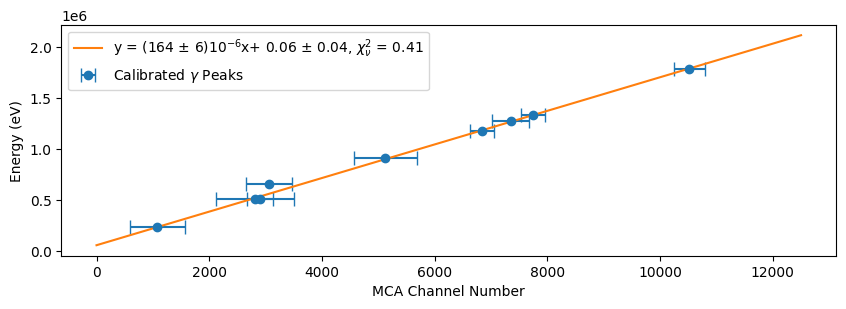

In [4]:
#co60
co60 = pd.read_csv('co60Fits.csv')
trueVals = np.array([1173.2e3, 1332.5e3, 510.99e3, 1274.53e3, 1785.52e3, 238.6e3,  511e3, 911.2e3, 662e3])
mcaChannelsMean = []
mcaChannelsError = []
for i in range(2):
    peaks = 0
    peakList = []
    peakWidths = []
    for j in range(1):
        peaks += unc.ufloat(co60.iloc[j,i*2], co60.iloc[j,(i)*2+1])
        peakList.append(co60.iloc[j,i*2])
        peakWidths.append(co60.iloc[j,(i)*2+1])
    # mcaChannelsMean.append(peaks.n)
    # mcaChannelsError.append(peaks.s)
    mcaChannelsMean.append(np.mean(peakList))
    mcaChannelsError.append(np.mean(peakWidths))
na22 = pd.read_csv('na22Fits.csv')

for i in range(3):
    peaks = 0
    peakList = []
    peakWidths = []
    for j in range(1):
        peaks += unc.ufloat(na22.iloc[j,i*2], na22.iloc[j,(i)*2+1])
        peakList.append(na22.iloc[j,i*2])
        peakWidths.append(na22.iloc[j,(i)*2+1])
    # mcaChannelsMean.append(peaks.n)
    # mcaChannelsError.append(peaks.s)
    mcaChannelsMean.append(np.mean(peakList))
    mcaChannelsError.append(np.mean(peakWidths))

th232 = pd.read_csv('th232Fits.csv')

for i in range(3):
    peaks = 0
    peakList = []
    peakWidths = []
    for j in range(1):
        peaks += unc.ufloat(th232.iloc[j,i*2], th232.iloc[j,(i)*2+1])
        peakList.append(th232.iloc[j,i*2])
        peakWidths.append(th232.iloc[j,(i)*2+1])
    # mcaChannelsMean.append(peaks.n)
    # mcaChannelsError.append(peaks.s)
    mcaChannelsMean.append(np.mean(peakList))
    mcaChannelsError.append(np.mean(peakWidths))

cs137 = pd.read_csv('cs137Fits.csv')
peakList = []
peakWidths = []
for j in range(1):
    peakList.append(cs137.iloc[j,0])
    peakWidths.append(cs137.iloc[j,1])
mcaChannelsMean.append(np.mean(peakList))
mcaChannelsError.append(np.mean(peakWidths))

mcaChannelsMean = np.array(mcaChannelsMean)
mcaChannelsError = np.array(mcaChannelsError)
plt.figure(figsize=(10, 3))
plt.errorbar(mcaChannelsMean, trueVals, xerr=mcaChannelsError, fmt='o', capsize=5, label = r"Calibrated $\gamma$ Peaks")
#fitting
popt, pcov = curve_fit(inverse_linear, trueVals, mcaChannelsMean, sigma=mcaChannelsError, absolute_sigma=True)
chi2 = np.sum(np.pow(mcaChannelsMean-inverse_linear(trueVals, *popt), 2)/(np.array(mcaChannelsError)**2))/(len(mcaChannelsMean)-2)
print('Chi Squared:', chi2)
fitUnc = np.sqrt(np.diag(pcov))
print(popt)
print(fitUnc)
label = rf"y = ({popt[0]:.0f} $\pm$ {fitUnc[0]:.0f})$10^{{-6}}$x+ {popt[1]*1e-6:.2f} $\pm$ {fitUnc[1]*1e-6:.2f}, $\chi^2_\nu$ = {chi2:.2f}"
plt.plot(np.linspace(0, 12500, 100), linear_fit(np.linspace(0, 12500, 100), *popt), label=label)
plt.ylabel('Energy (eV)')
plt.xlabel('MCA Channel Number')
plt.legend()
plt.savefig('plots/MCA_Calibration.svg', bbox_inches='tight')
plt.show()


def energyUncFromEnergy(energy):
    mca = inverse_linear(energy, *popt)
    slope = unumpy.uarray(popt[0], fitUnc[0])
    intercept = unumpy.uarray(popt[1], fitUnc[1])
    energy = mca*slope + intercept
    return unumpy.std_devs(energy)

def energyUncFromMCA(mca):
    slope = unumpy.uarray(popt[0], fitUnc[0])
    intercept = unumpy.uarray(popt[1], fitUnc[1])
    energy = mca*slope + intercept
    return unumpy.std_devs(energy)




[2.0120299  2.34232705]
[0.00072346 0.00544512]
[-2.52368424  5.35153761] [-2.90195129  5.9581438 ]
[0.00513636 0.00899789] [0.00753033 0.01131057]
BetaFitQ 2.012029903916959 +/- 0.0007234648937351613 or +/- 0.08300269338490011
KurieQ 2.120525830685747 +/- 0.0055980595766326096 or +/- 0.08650884434896823
2.12+/-0.09
KurieQ from X err 2.0531508623577253 +/- 0.006601222148097552


C:\Users\skell\AppData\Local\Temp\ipykernel_35096\3064088357.py:18: RuntimeWarning: overflow encountered in exp
  return eta**(2*s(Z))*np.exp(np.pi*delta(Z, eta))*np.abs(gamma(1+s(Z)+1j*delta(Z, eta)))**2
C:\Users\skell\AppData\Local\Temp\ipykernel_35096\3064088357.py:18: RuntimeWarning: invalid value encountered in multiply
  return eta**(2*s(Z))*np.exp(np.pi*delta(Z, eta))*np.abs(gamma(1+s(Z)+1j*delta(Z, eta)))**2


<Figure size 1000x300 with 0 Axes>

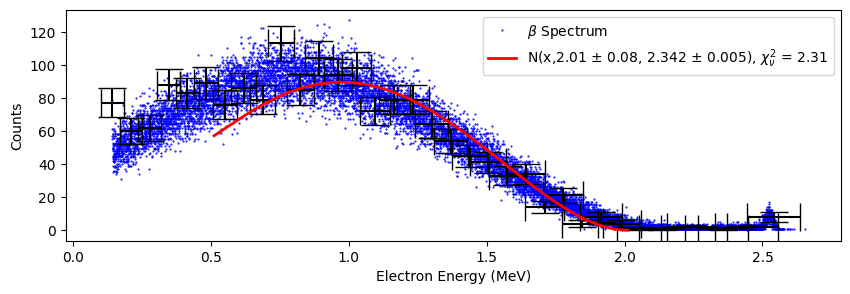

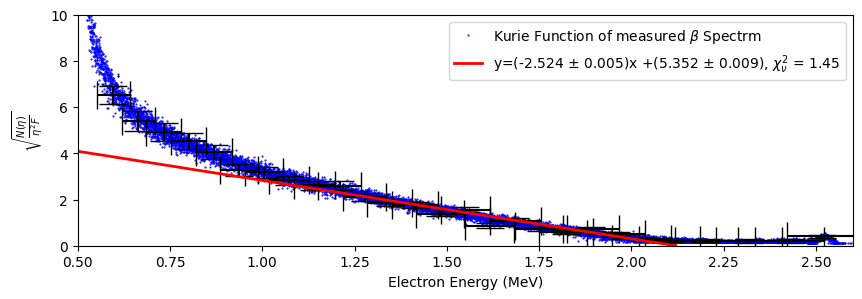

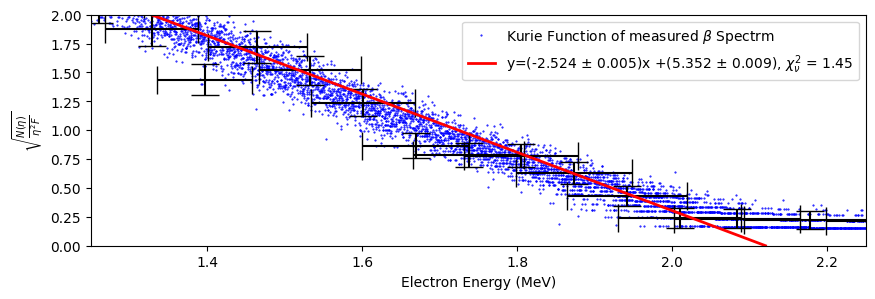

In [5]:
hbar = 6.58211956e-16 # eV*s
e = 1.60217662e-19 # C
c = 299792458 #m/s
me = 0.51099895000 # eV/c^2
alpha = 1/137
Z = 53

def s(Z):
    return np.sqrt(1-Z**2/137**2) -1

def delta(z, eta):
    return z*(1+eta**2)**0.5/(137*eta)

def S(Z):
    return np.sqrt(1-Z**2/137**2)

def fermi(Z, eta):
    return eta**(2*s(Z))*np.exp(np.pi*delta(Z, eta))*np.abs(gamma(1+s(Z)+1j*delta(Z, eta)))**2



def FERMI(Z, eta):
    E = 2.71828
    return eta**(2*s(Z))*E**(np.pi*delta(Z, eta))*np.abs(gamma(1+s(Z)+1j*unumpy.nominal_values(delta(Z, eta))))**2
def Eta(epsilon):
    return np.sqrt(epsilon**2-1)

def epsilon(eta):
    return np.sqrt(1+eta**2)

def EtoEpsilon(E):
    return E/0.51099895069

def N(eta, Const, q):
    Q = q/0.51099895069 
    return Const*eta**2*(Q-epsilon(eta))**2*fermi(Z, eta)

def NEpsilon(epsilon, Const, q):
    Q = q/0.51099895069
    eta = Eta(epsilon)
    return Const*(Q-epsilon)**2*fermi(Z, eta)*eta*epsilon


# etas = np.linspace(0.001,Eta(Q),1000, endpoint=True)
# Ns = N(etas, 1, Q)

# plt.plot(etas, Ns)
# plt.xlabel(r'$\eta$')
# plt.ylabel(r'$N(\eta)$')
# plt.show()
# epsilons = np.linspace(1.001, Q, 1000, endpoint=True)
# etas = Eta(epsilons)
# Ns = N(etas, 1, Q)
# plt.plot(epsilons, Ns)
# plt.xlabel(r'$\epsilon$')
# plt.ylabel(r'$N(\epsilon)$')
# plt.show()

# kurie = np.sqrt(Ns/(etas**2*fermi(Z, etas)))
# plt.figure(figsize=(10,5))
# plt.plot(epsilons, kurie)
# plt.xlabel(r'$\epsilon$')
# plt.ylabel(r'$\sqrt{\frac{N(\eta)}{\eta^2F}}$')
# plt.show()

def betaFit(E, Q, A):
    epsilon = EtoEpsilon(E)
    return np.where(epsilon > 1, NEpsilon(epsilon, A, Q), 0)

    


Q = 2.1221
betaScan = pd.read_csv('Gp3_data_E1/NaI Beta Spectrum/Run6_300s_threshold250.csv', skiprows=6)
betaScan["Channel"] = betaScan["Channel"]
#drop any rows where counts are 0
betaScan = betaScan[betaScan['Counts'] > 0]
betaScan['uncs'] = np.sqrt(betaScan["Counts"])
#make anything with 0 counts 1 count

plt.figure(figsize=(10,3))
plt.plot(betaScan['Channel'], betaScan['Counts'], "bo", markersize=0.5, label = r"$\beta$ Spectrum")
plt.errorbar(betaScan['Channel'][::400], betaScan['Counts'][::400], yerr=betaScan['uncs'][::400], fmt='ko', markersize=0.001, capsize=10)
plt.xlabel("MCA Channel Number")
plt.ylabel("Counts")
plt.legend()
plt.savefig('plots/raw/betaSpectrum_raw.svg', bbox_inches='tight')
plt.clf()



energyFits = [popt,popt - fitUnc,  popt + fitUnc]
betaPopts = []
betaPcovs = []
kuriePopts = []
kuriePcovs = []
kurieNoNeutrinoPopts = []
kurieNoNeutrinoPcovs = []


betaScan["energy"] = linear_fit(betaScan["Channel"], *(energyFits[i]))*1e-6
betaScan["energyUnc"] = energyUncFromMCA(betaScan["Channel"])*1e-6
# plt.plot(betaScan['energy'], betaScan['energyUnc'], "bo", markersize=0.5, label = r"$\beta$ Spectrum")
# plt.show()
maxIndex = np.argmin(np.abs(betaScan['energy']-Q))
minIdx = np.argmin(np.abs(betaScan['energy']-0.52))

# minIdx = 251
popt1, pcov1 = curve_fit(betaFit, betaScan['energy'][minIdx:maxIndex], betaScan['Counts'][minIdx:maxIndex], sigma=betaScan['uncs'][minIdx:maxIndex], p0=[Q, 10], bounds = ([Q-0.5, 1], [Q+0.5, 1e5]), absolute_sigma=True)
# betaPopts.append(popt1)
# betaPcovs.append(np.sqrt(np.diag(pcov1)))

betaFitUnc = np.sqrt(np.diag(pcov1))
print(popt1)
print(betaFitUnc)


#only use energy greater than 0.511 MeV
betaScanCp = betaScan[betaScan['energy'] > 0.511]
kurie = np.sqrt(betaScanCp["Counts"]/(Eta(EtoEpsilon(betaScanCp["energy"]))**2*fermi(Z, Eta(EtoEpsilon(betaScanCp["energy"])))))
maxIndexKurie = np.argmin(np.abs(betaScanCp['energy']-Q))
minIdxKurie = np.argmin(np.abs(betaScanCp['energy']-1))

countsWithErr = unumpy.uarray(betaScanCp["Counts"].to_numpy(), betaScanCp["uncs"].to_numpy())
energyWithErr = unumpy.uarray(betaScanCp["energy"].to_numpy(), betaScanCp["energyUnc"].to_numpy())
kurieErr = (countsWithErr/(((energyWithErr/me)**2-1)*FERMI(Z, ((energyWithErr/me)**2-1)**0.5)))**0.5
kurieErr = unumpy.std_devs(kurieErr)

popt2, pcov2 = curve_fit(linear_fit, betaScanCp['energy'][minIdxKurie:maxIndexKurie], kurie[minIdxKurie:maxIndexKurie], sigma=kurieErr[minIdxKurie:maxIndexKurie], absolute_sigma=True)
kurieFitUnc = np.sqrt(np.diag(pcov2))

popt3, pcov3 = curve_fit(inverse_linear,kurie[minIdxKurie:maxIndexKurie], betaScanCp['energy'][minIdxKurie:maxIndexKurie] , sigma=betaScanCp["energyUnc"][minIdxKurie:maxIndexKurie], absolute_sigma=True, p0=popt2)
kurie2fitUnc = np.sqrt(np.diag(pcov3))
print(popt2, popt3)
print(kurieFitUnc, kurie2fitUnc)

betaChisq = np.sum(np.pow(betaScan['Counts'][minIdx:maxIndex]-betaFit(betaScan['energy'][minIdx:maxIndex], *(popt1)), 2)/(np.array(betaScan['uncs'][minIdx:maxIndex])**2))/(len(betaScan['Counts'][minIdx:maxIndex])-2)
kurieChisq = np.sum(np.pow(kurie[minIdxKurie:maxIndexKurie]-linear_fit(betaScanCp['energy'][minIdxKurie:maxIndexKurie], *(popt2)), 2)/((kurieErr[minIdxKurie:maxIndexKurie])**2))/(len(kurie[minIdxKurie:maxIndexKurie])-2)

print("BetaFitQ", popt1[0], "+/-", betaFitUnc[0], "or +/-", energyUncFromEnergy(popt1[0]*1e6)*1e-6)
betaQunc = energyUncFromEnergy(popt1[0]*1e6)*1e-6
slope = unc.ufloat(popt2[0], kurieFitUnc[0])
intercept = unc.ufloat(popt2[1], kurieFitUnc[1])
kurieQ = -intercept/slope
energyUnc = unc.ufloat(0, energyUncFromEnergy(kurieQ.n*1e6)*1e-6)
print("KurieQ", kurieQ.n, "+/-", kurieQ.s, "or +/-", energyUncFromEnergy(kurieQ.n*1e6)*1e-6)
print(kurieQ + energyUnc)
slope = unc.ufloat(popt3[0], np.sqrt(np.diag(pcov3))[0])
intercept = unc.ufloat(popt3[1], np.sqrt(np.diag(pcov3))[1])
kurieQ2 = -intercept/slope
print("KurieQ from X err", kurieQ2.n, "+/-", kurieQ2.s)



plt.figure(figsize=(10,3))
plt.plot((betaScan['energy']), betaScan['Counts'], "bo", markersize=0.5, label = r"$\beta$ Spectrum")
plt.errorbar(betaScan['energy'][::400], betaScan['Counts'][::400], yerr=betaScan['uncs'][::400], xerr = betaScan["energyUnc"][::400], fmt='ko', markersize=0.001, capsize=10)
plt.xlabel(r"Energy (MeV)")
plt.ylabel("Counts")
plt.legend()
plt.plot((np.linspace(me,popt1[0], 1000)), betaFit(np.linspace(me+1e-9,popt1[0], 1000), *(popt1)), "r-", linewidth=2, label = rf"N(x,{popt1[0]:.2f} $\pm$ {betaQunc:.2f}, {(popt1[1]):.3f} $\pm$ {(betaFitUnc[1]):.3f}), $\chi^2_\nu$ = {betaChisq:.2f}")

plt.xlabel(r"Electron Energy (MeV)")
plt.ylabel("Counts")
plt.legend()
plt.savefig('plots/betaSpectrum_fit.svg', bbox_inches='tight')
plt.show()


plt.figure(figsize=(10,3))
plt.plot((betaScanCp["energy"]), kurie, "bo", markersize=0.5, label = r"Kurie Function of measured $\beta$ Spectrm")
plt.errorbar(betaScanCp["energy"][500::400], kurie[500::400], yerr=kurieErr[500::400], xerr = betaScanCp["energyUnc"][500::400], fmt='ko', markersize=0.001, capsize=10)
label =rf"y=({popt2[0]:.3f} $\pm$ {kurieFitUnc[0]:.3f})x +({(popt2[1]):.3f} $\pm$ {(kurieFitUnc[1]):.3f}), $\chi^2_\nu$ = {kurieChisq:.2f}"
plt.plot(np.linspace(0,kurieQ.n,1000), linear_fit(np.linspace(0,kurieQ.n,1000), *(popt2)), "r-", linewidth=2, label=label)

plt.ion()

plt.xlabel(r"Electron Energy (MeV)")
plt.ylabel(r"$\sqrt{\frac{N(\eta)}{\eta^2F}}$")
plt.xlim(0.5,2.6)
plt.ylim(0,10)
plt.legend()
plt.savefig('plots/kurie_fit.svg', bbox_inches='tight')
plt.show()
plt.figure(figsize=(10,3))
plt.plot((betaScanCp["energy"]), kurie, "bo", markersize=0.5, label = r"Kurie Function of measured $\beta$ Spectrm")
plt.errorbar(betaScanCp["energy"][::400], kurie[::400], yerr=kurieErr[::400], xerr = betaScanCp["energyUnc"][::400], fmt='ko', markersize=0.001, capsize=10)
label = rf"y=({popt2[0]:.3f} $\pm$ {kurieFitUnc[0]:.3f})x +({(popt2[1]):.3f} $\pm$ {(kurieFitUnc[1]):.3f}), $\chi^2_\nu$ = {kurieChisq:.2f}"
plt.plot(np.linspace(0,kurieQ.n,1000), linear_fit(np.linspace(0,kurieQ.n,1000), *(popt2)), "r-", linewidth=2, label=label)

plt.ion()

plt.xlabel(r"Electron Energy (MeV)")
plt.ylabel(r"$\sqrt{\frac{N(\eta)}{\eta^2F}}$")
plt.xlim(0.5,2.6)
plt.ylim(0,10)
plt.legend()
plt.xlim(1.25,2.25)
plt.ylim(0,2)
plt.savefig('plots/kurie_fit_zoom.svg', bbox_inches='tight')
plt.show()
    
    



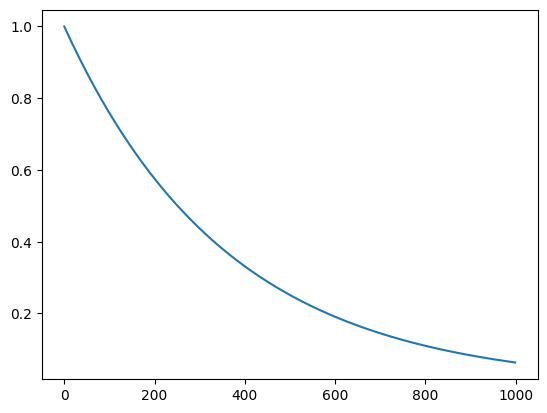

In [6]:
#362.62576264 6834.41115302  209.62880261
impulseResp = np.exp(-np.linspace(0, 1, 1000)/0.36262576264)
plt.plot(impulseResp)